In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt
from itertools import product 
from pywt import central_frequency
from numpy.fft import rfft, rfftfreq


In [2]:
dataset = pd.read_pickle('../data/prepared_data/train_1_fi.pkl')
# dataset_2 = pd.read_pickle('../data/prepared_data/train_2_fi.pkl')

In [3]:
dataset.shape

(54000, 8)

# Overview wavelets

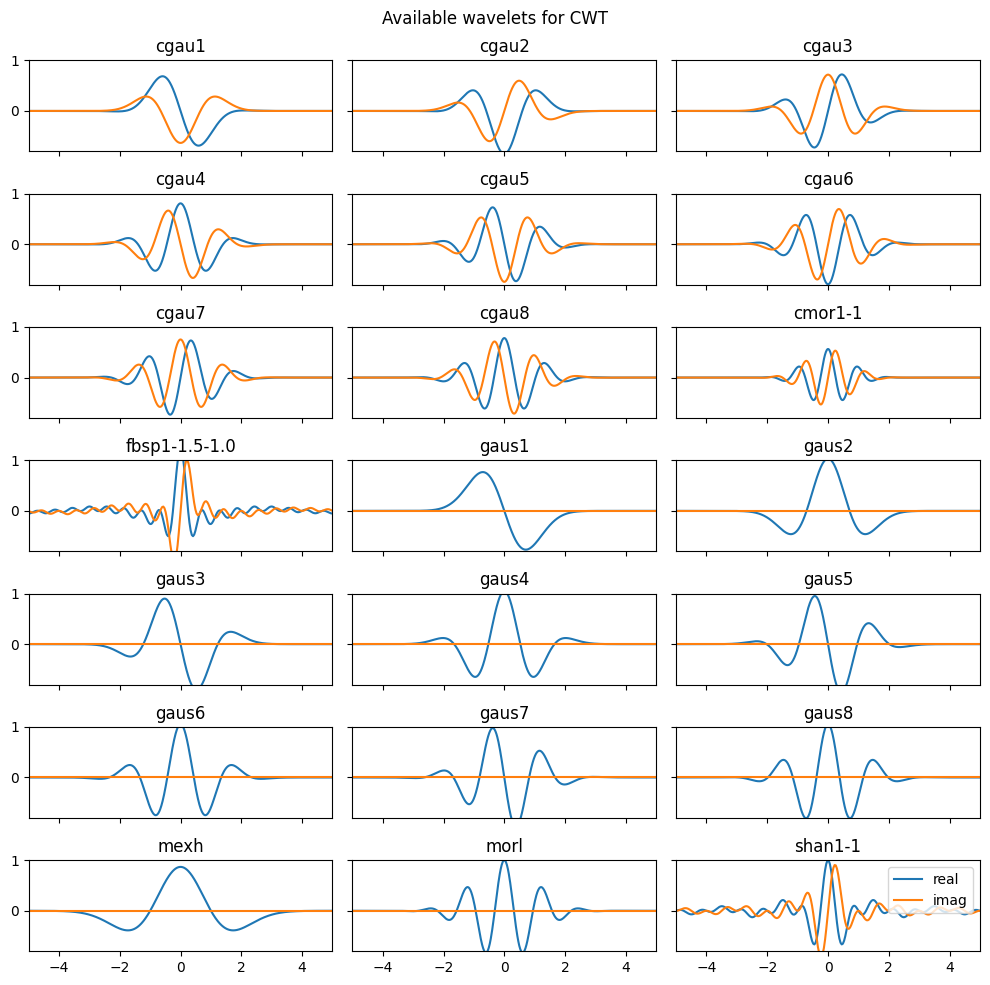

In [4]:
wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

# Wavelet list

In [5]:
wavelist = pywt.wavelist(kind='continuous')
print(wavelist)

['cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'mexh', 'morl', 'shan']


# Explore wavelet params

In [6]:
wavelet = pywt.ContinuousWavelet('cgau3')
wavelet.bandwidth_frequency, wavelet.center_frequency

(None, None)

In [7]:
wavelet = pywt.ContinuousWavelet('cmor12242-1000')
wavelet.bandwidth_frequency, wavelet.center_frequency

(12242.0, 1000.0)

In [8]:
wavelet = pywt.ContinuousWavelet('gaus5')
wavelet.bandwidth_frequency, wavelet.center_frequency

(None, None)

In [9]:
wavelet = pywt.ContinuousWavelet('shan1.5-1.5')
wavelet.bandwidth_frequency, wavelet.center_frequency

(1.5, 1.5)

# Central and bandwidth frequency 

In [10]:
wavelet_type = 'fbsp1-'
bandwidth_frequency = 2
central_frequency = 2

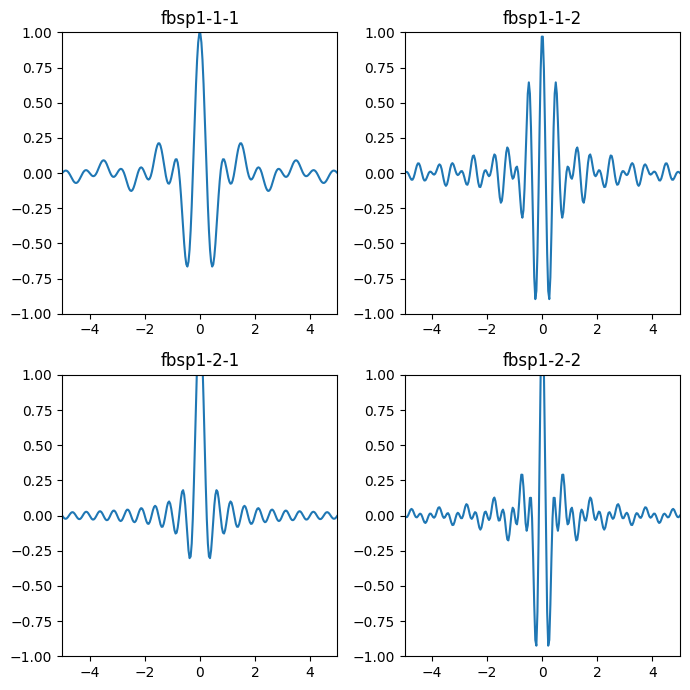

In [11]:
wavlist_coef = product([1, central_frequency],
                  [1, bandwidth_frequency])
wavlist = [f'{wavelet_type}{bandwidth_frequency}-{center_frequency}' for bandwidth_frequency, center_frequency in wavlist_coef]
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    # ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-1, 1])

# ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

# Different wavelets

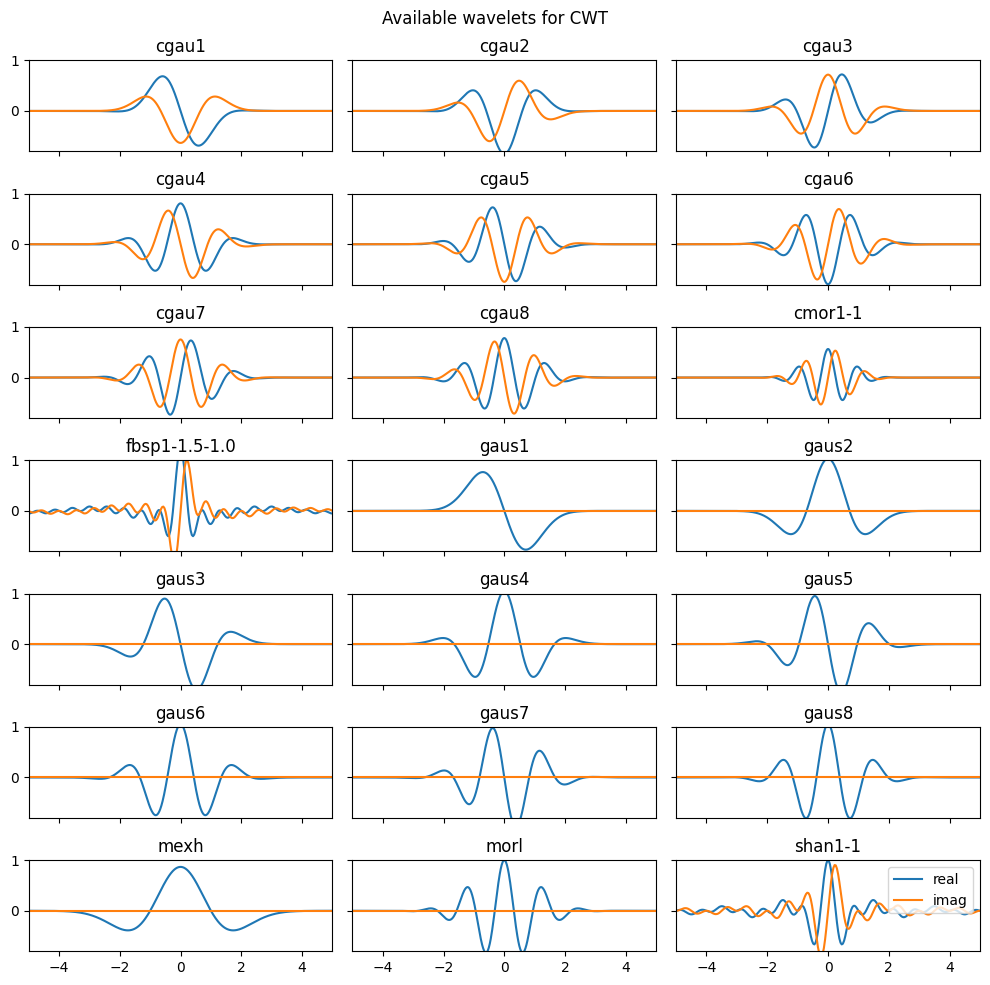

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import pywt

wavlist = pywt.wavelist(kind="continuous")
cols = 3
rows = (len(wavlist) + cols - 1) // cols
fig, axs = plt.subplots(rows, cols, figsize=(10, 10),
                        sharex=True, sharey=True)
for ax, wavelet in zip(axs.flatten(), wavlist):
    # A few wavelet families require parameters in the string name
    if wavelet in ['cmor', 'shan']:
        wavelet += '1-1'
    elif wavelet == 'fbsp':
        wavelet += '1-1.5-1.0'

    [psi, x] = pywt.ContinuousWavelet(wavelet).wavefun(10)
    ax.plot(x, np.real(psi), label="real")
    ax.plot(x, np.imag(psi), label="imag")
    ax.set_title(wavelet)
    ax.set_xlim([-5, 5])
    ax.set_ylim([-0.8, 1])

ax.legend(loc="upper right")
plt.suptitle("Available wavelets for CWT")
plt.tight_layout()
plt.show()

# Apply wavelet

In [13]:
time = dataset['Timestamp']

In [14]:
def plot_wavelet(freqs, cwtmatr, col):
    fig, axs = plt.subplots(2, 1, figsize=(14, 7))
    axs[0].pcolormesh(time, freqs, cwtmatr)
    axs[0].set_yscale("log")
    axs[0].set_xlabel("Time (s)")
    axs[0].set_ylabel("Frequency (Hz)")
    axs[0].set_title("Continuous Wavelet Transform (Scaleogram)")
    # fig.colorbar(pcm, ax=axs[0])
    
    plt.plot(time, dataset[col])
    axs[1].set_xlim((time.min(), time.max()))
    axs[1].set_xlabel("Time, s")
    axs[1].set_ylabel("Value")
    axs[1].set_title(col)
    plt.tight_layout()

In [15]:
def plot_column_label(dataset, col):
    fig, ax1 = plt.subplots(figsize=(14, 5))
    ax2 = ax1.twinx()
    
    dataset.plot("Timestamp", col, ax=ax1, color='#ff7f0e')
    dataset.plot("Timestamp", "label", ax=ax2, color='#1f77b4')
    ax2.set_ylim((-1.5, 2))

In [16]:
dataset.columns

Index(['DM-FT03', '1001.16-OUT', '1001.17-OUT', 'DM-PCV02-Z', 'DM-FCV03-D',
       'DM-FCV02-D', 'label', 'Timestamp'],
      dtype='object')

## `DM-FT03` col

In [17]:
col = 'DM-FT03'

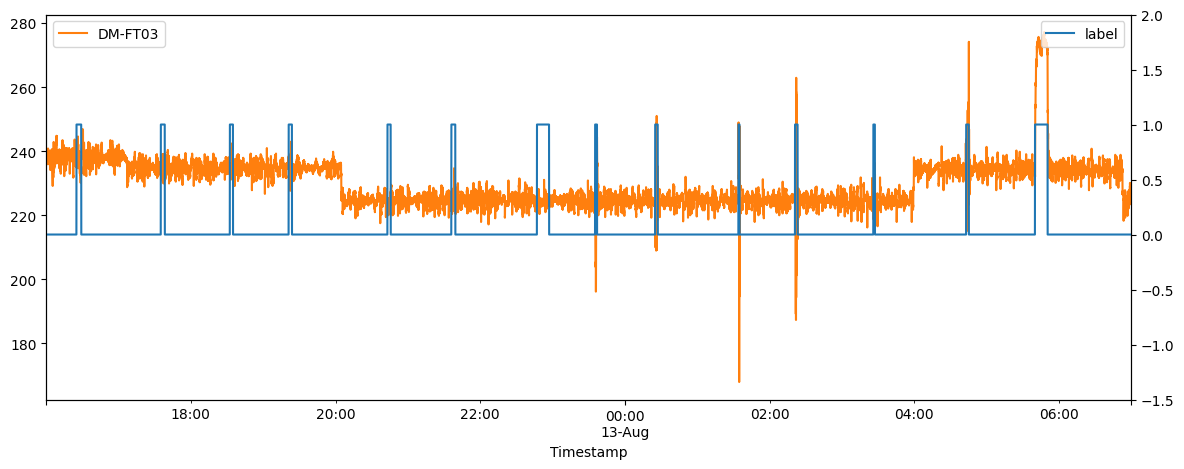

In [18]:
plot_column_label(dataset, col);

In [19]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

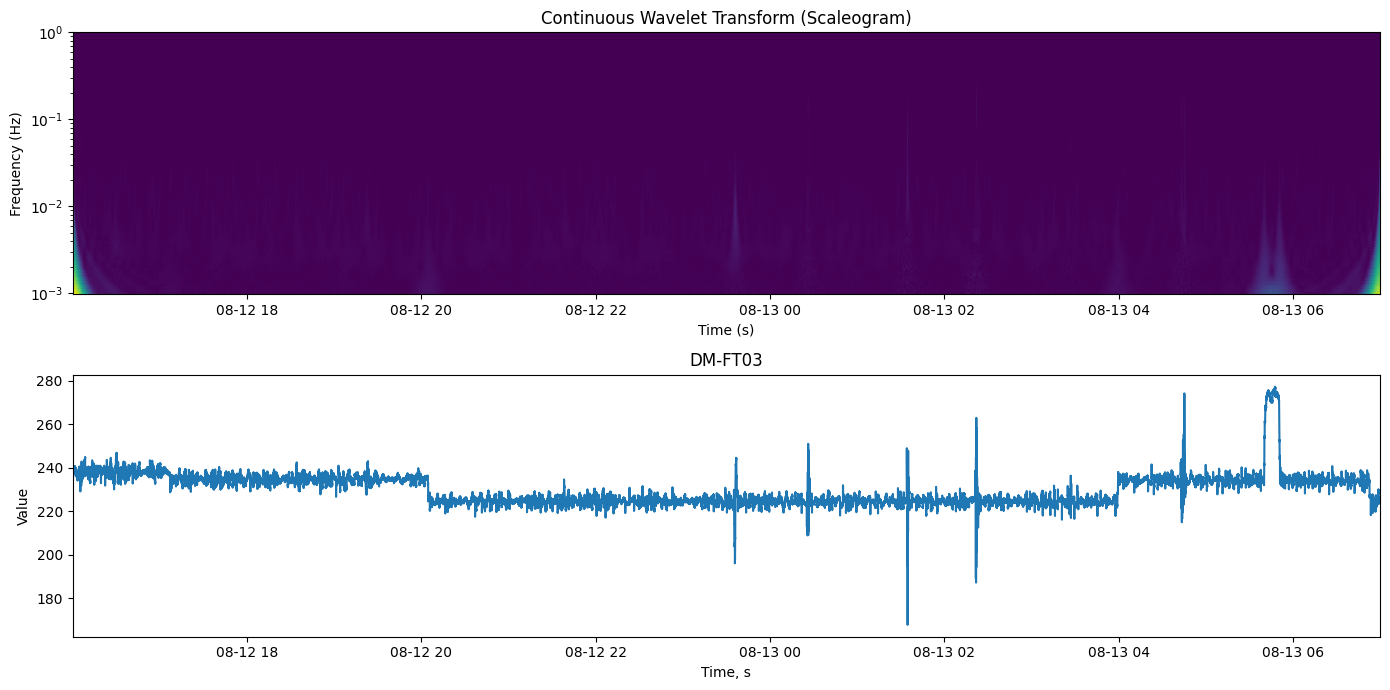

In [20]:
plot_wavelet(freqs, cwtmatr, col)

## `1001.16-OUT` col

In [21]:
col = '1001.16-OUT'

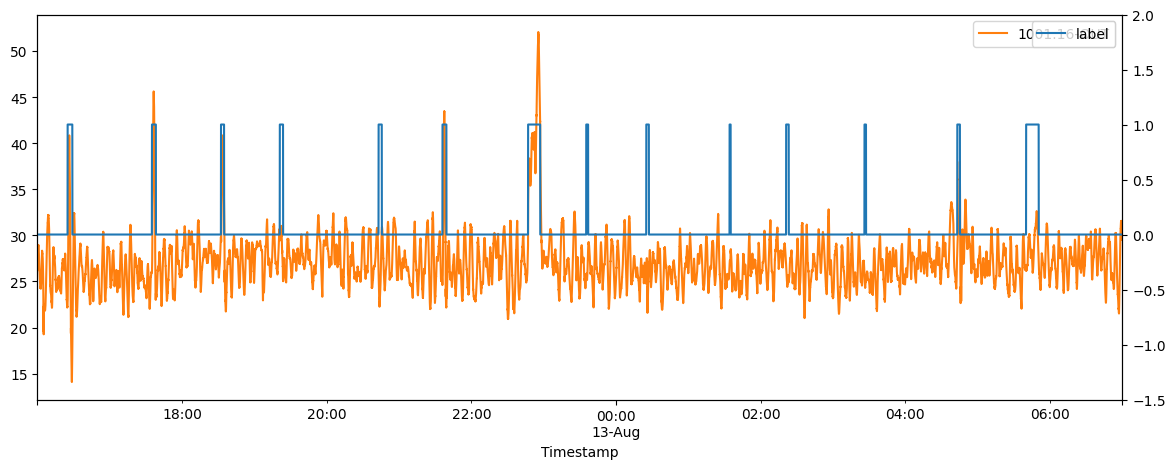

In [22]:
plot_column_label(dataset, col);

In [23]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

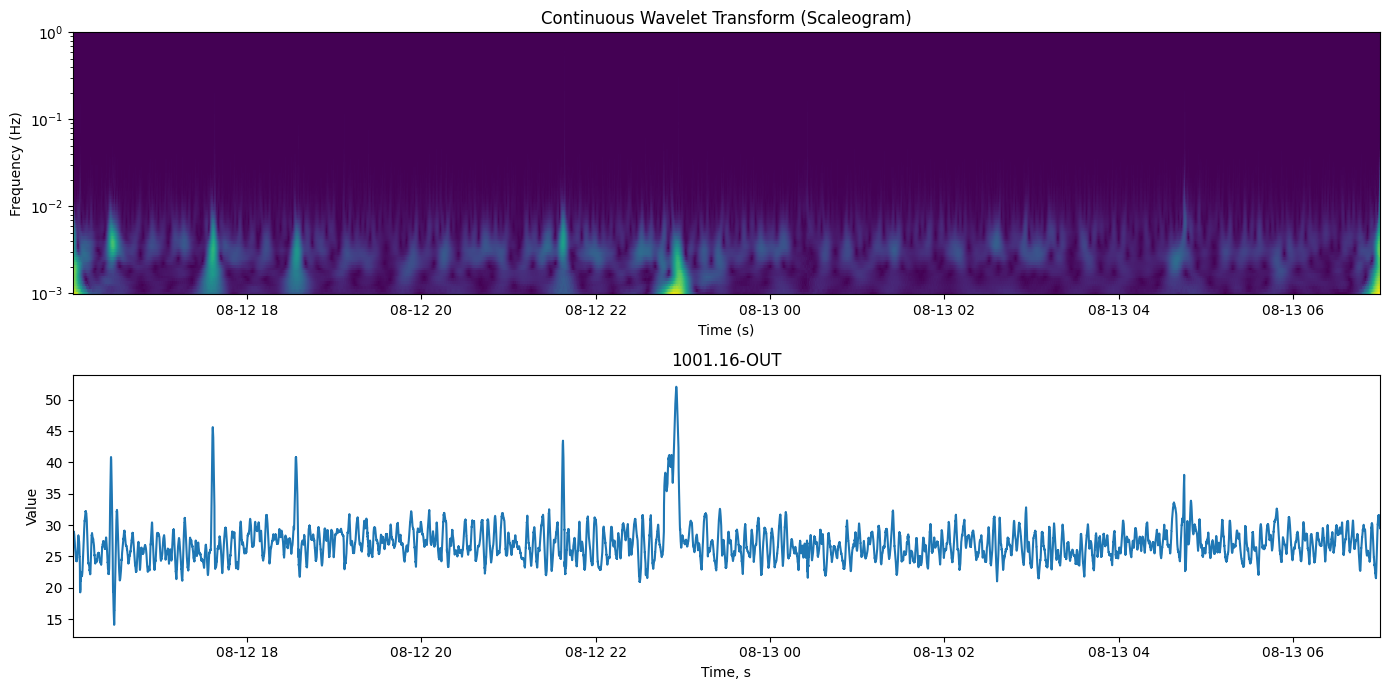

In [24]:
plot_wavelet(freqs, cwtmatr, col)

## `1001.17-OUT` col

In [25]:
col = '1001.17-OUT'

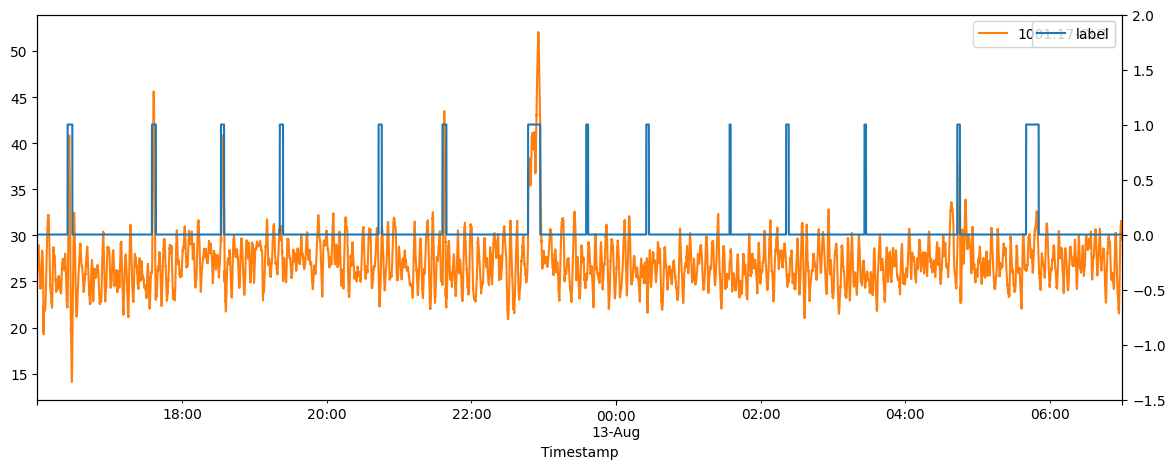

In [26]:
plot_column_label(dataset, col);

In [27]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

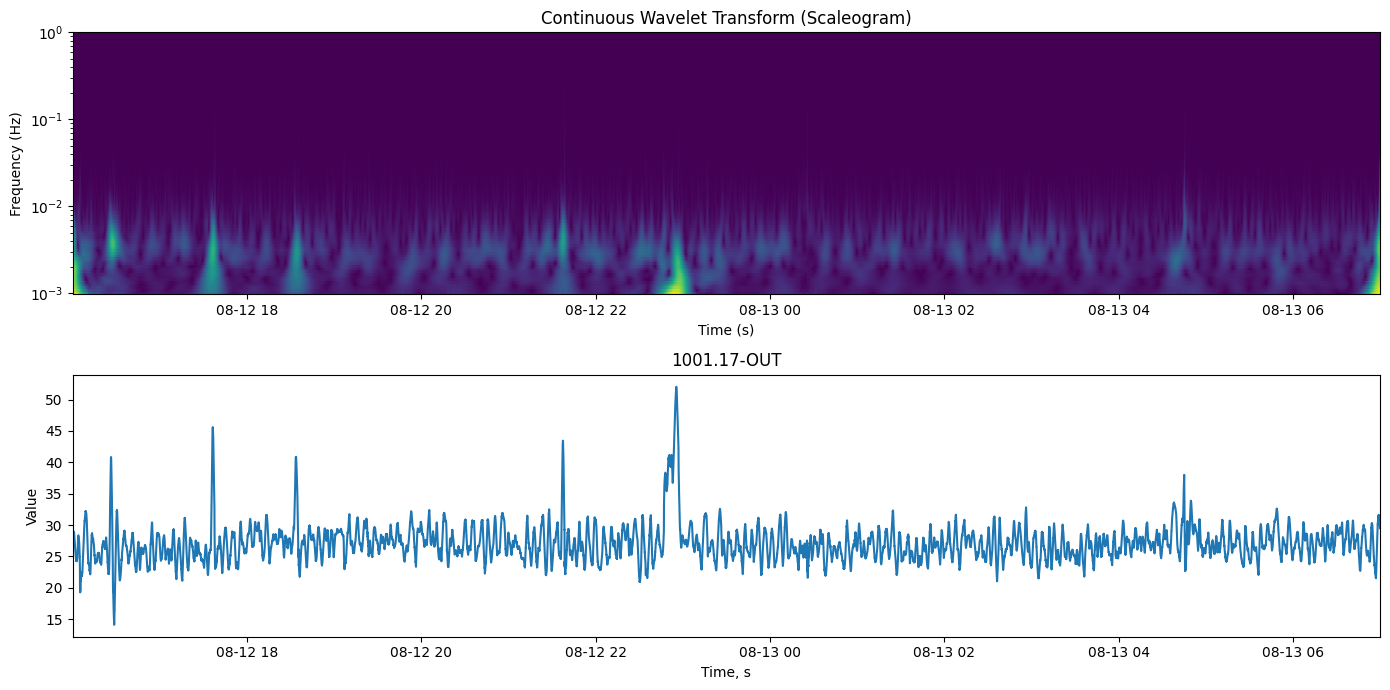

In [28]:
plot_wavelet(freqs, cwtmatr, col)

## `DM-PCV02-Z` col

In [29]:
col = 'DM-PCV02-Z'

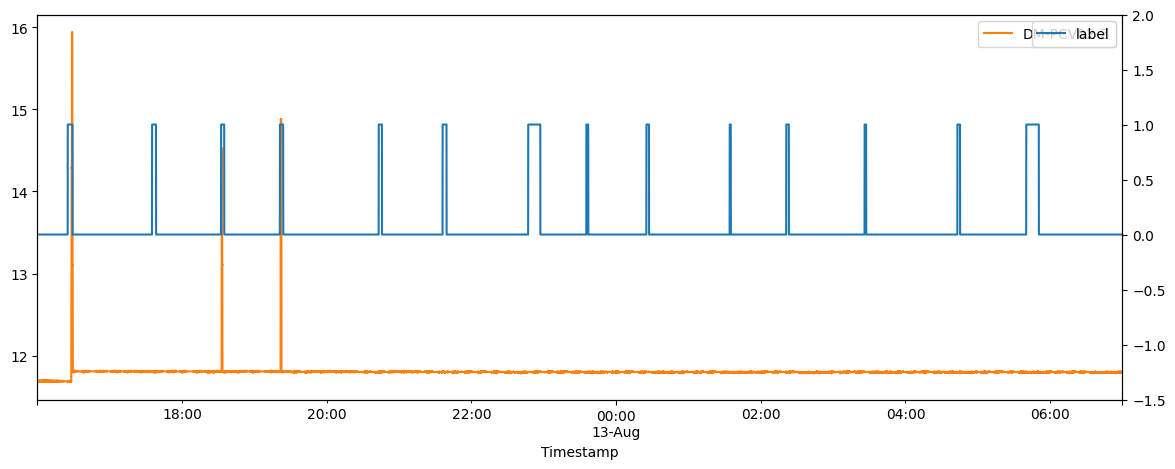

In [30]:
plot_column_label(dataset, col);

In [31]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

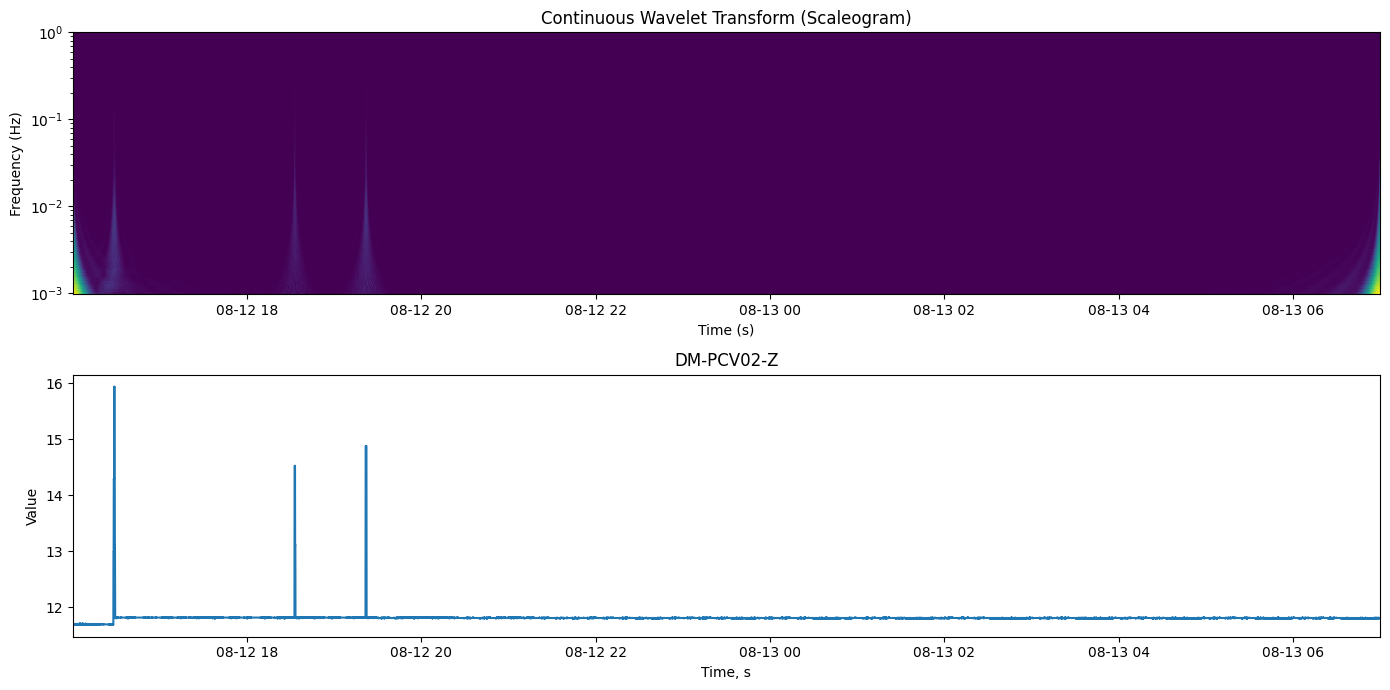

In [32]:
plot_wavelet(freqs, cwtmatr, col)

## `DM-FCV03-D` col

In [33]:
col = 'DM-FCV03-D'

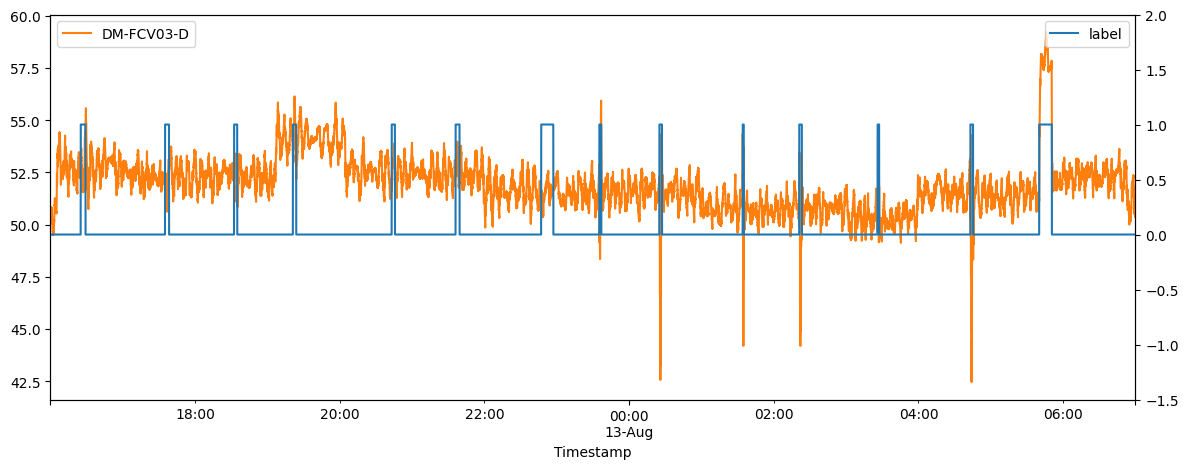

In [34]:
plot_column_label(dataset, col);

In [35]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

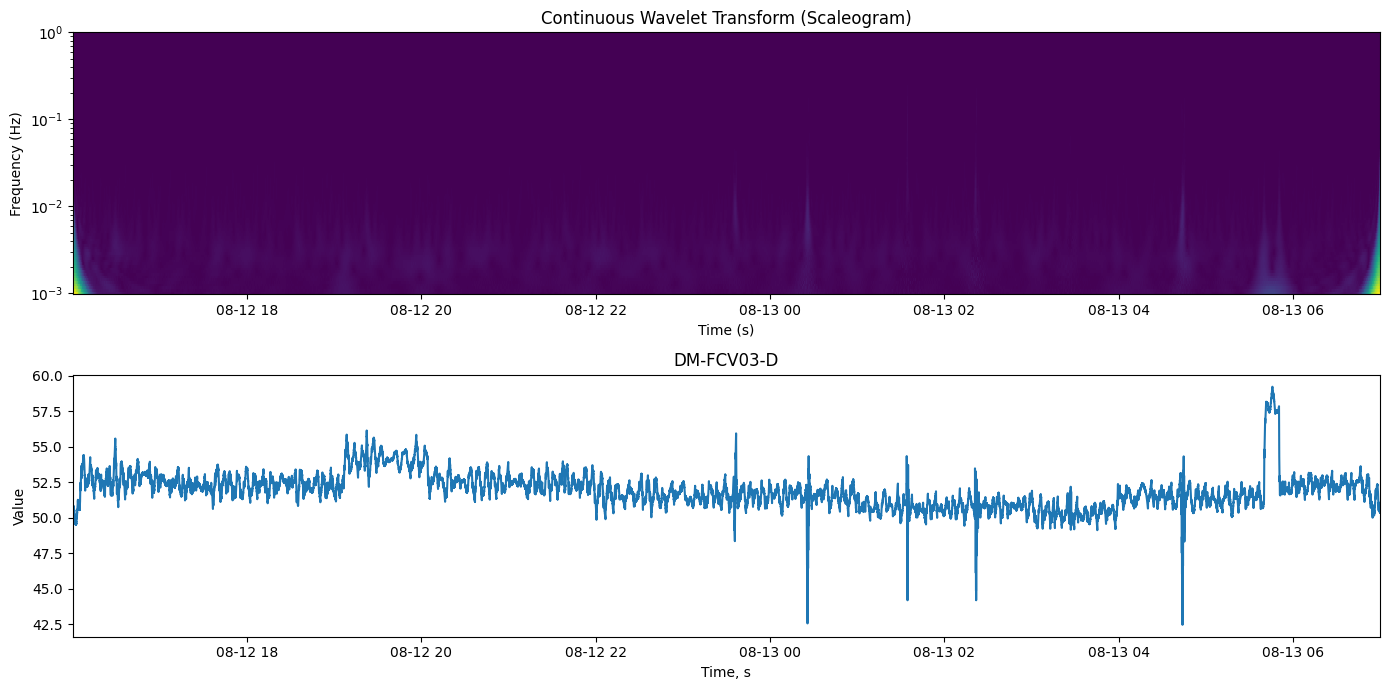

In [36]:
plot_wavelet(freqs, cwtmatr, col)

## `DM-FT03` col

In [37]:
col = 'DM-FT03'

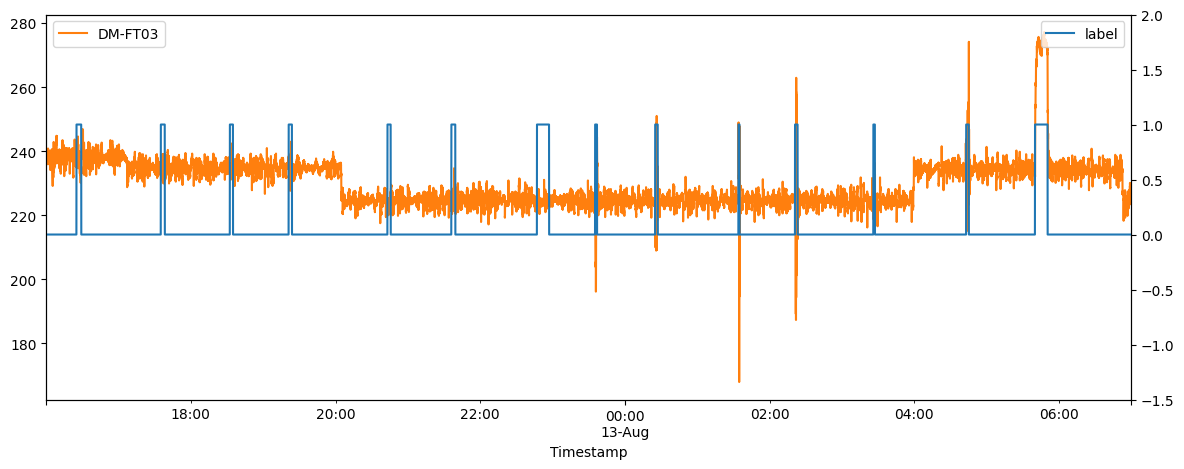

In [38]:
plot_column_label(dataset, col);

In [39]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

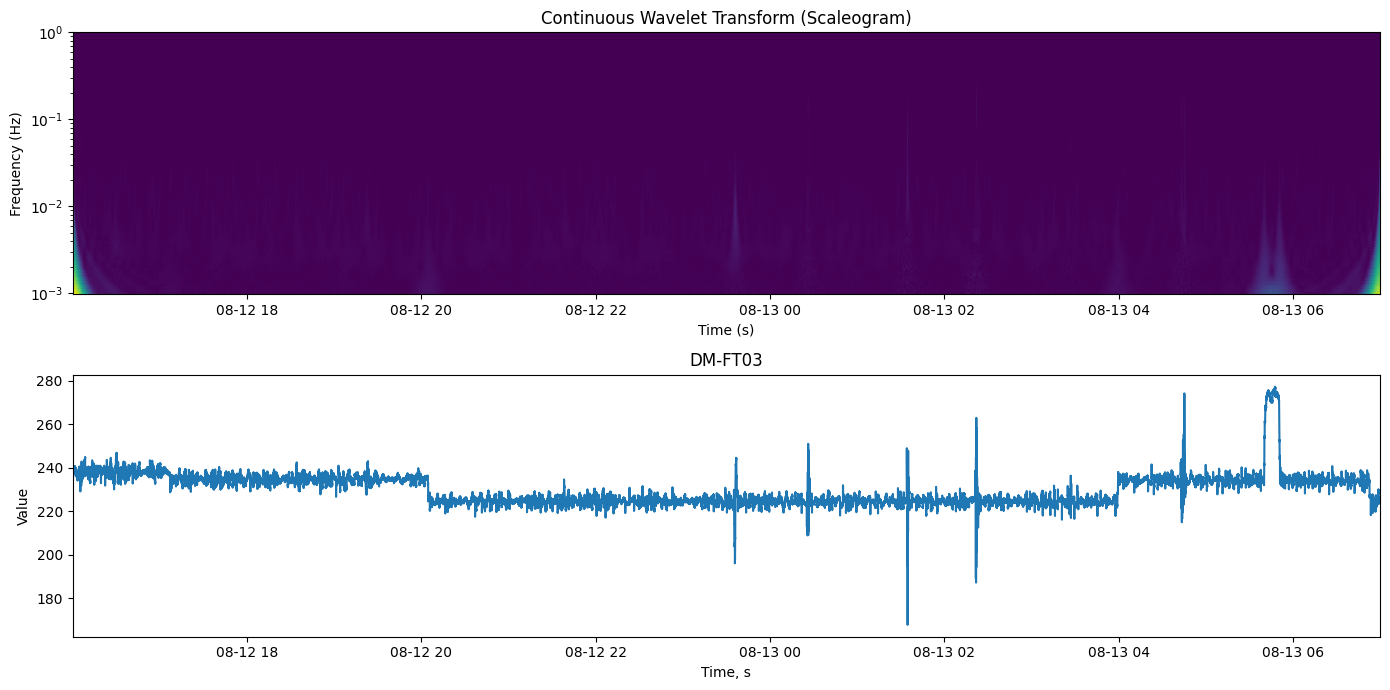

In [40]:
plot_wavelet(freqs, cwtmatr, col)

## `1001.17-OUT` column

In [41]:
col = '1001.17-OUT'

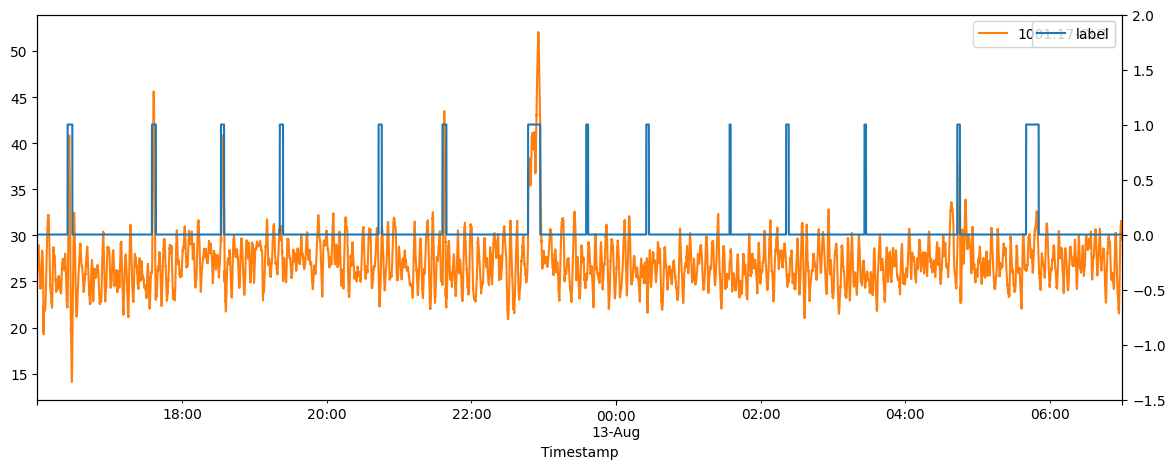

In [42]:
plot_column_label(dataset, col);

In [43]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

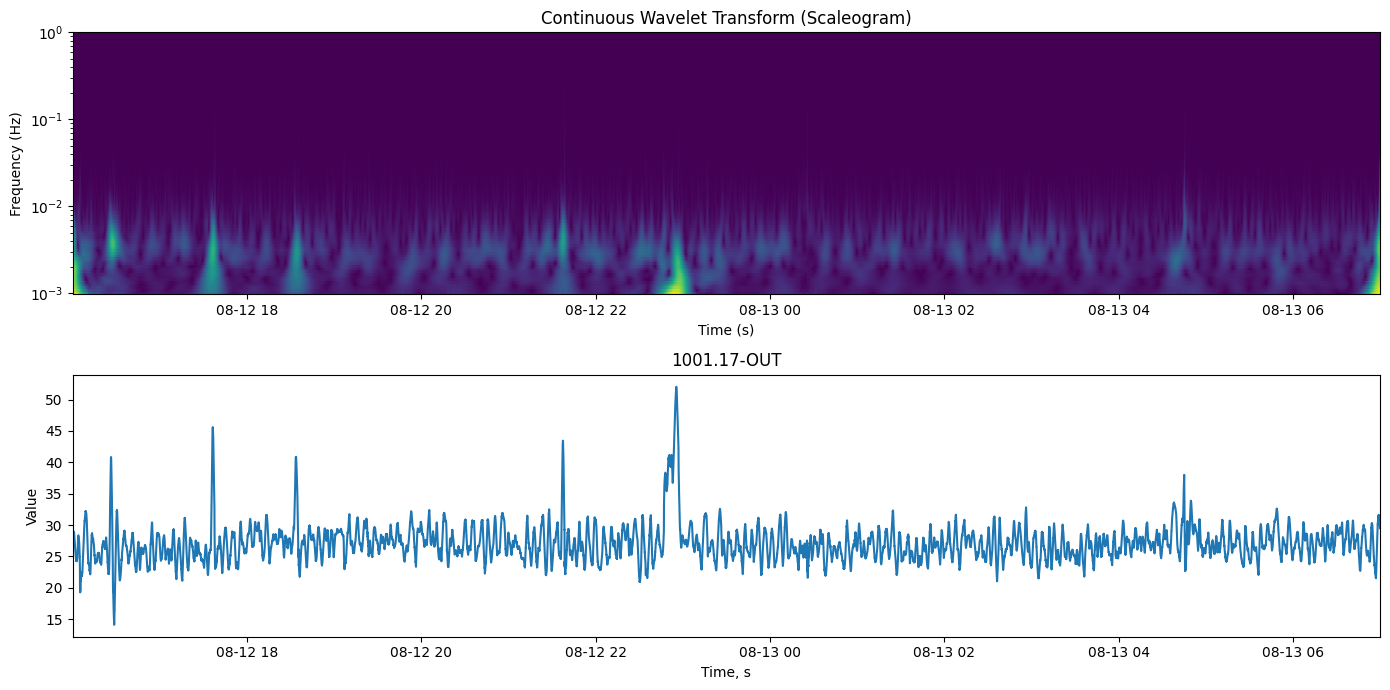

In [44]:
plot_wavelet(freqs, cwtmatr, col)

## `1001.16-OUT` column

In [45]:
col = '1001.16-OUT'

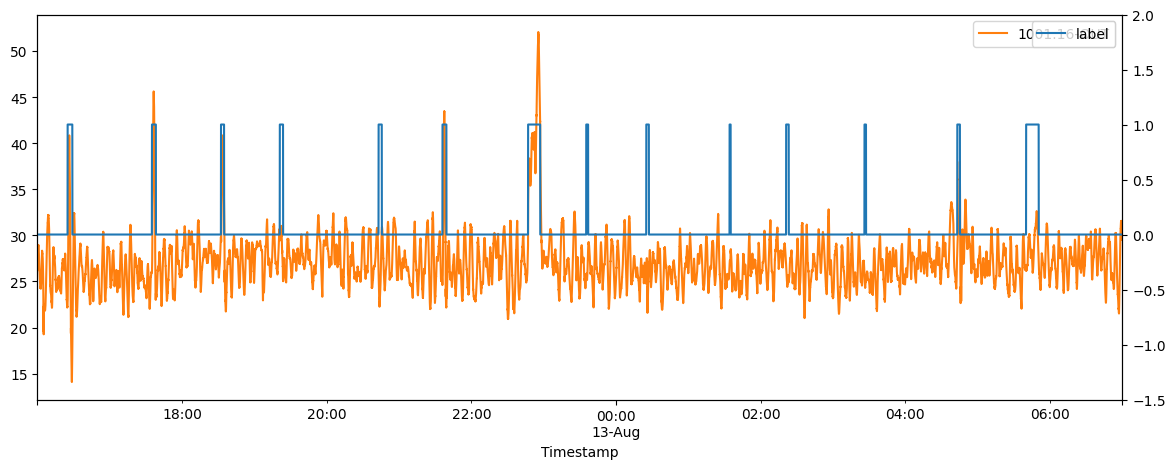

In [46]:
plot_column_label(dataset, col);

In [47]:
wavelet = "fbsp2-1.5-1.0"
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(dataset['Timestamp']).mean() / np.timedelta64(1, 's')

cwtmatr, freqs = pywt.cwt(dataset[col], widths, wavelet, sampling_period=sampling_period)
# absolute take absolute value of complex result
cwtmatr = np.abs(cwtmatr[:-1, :-1])

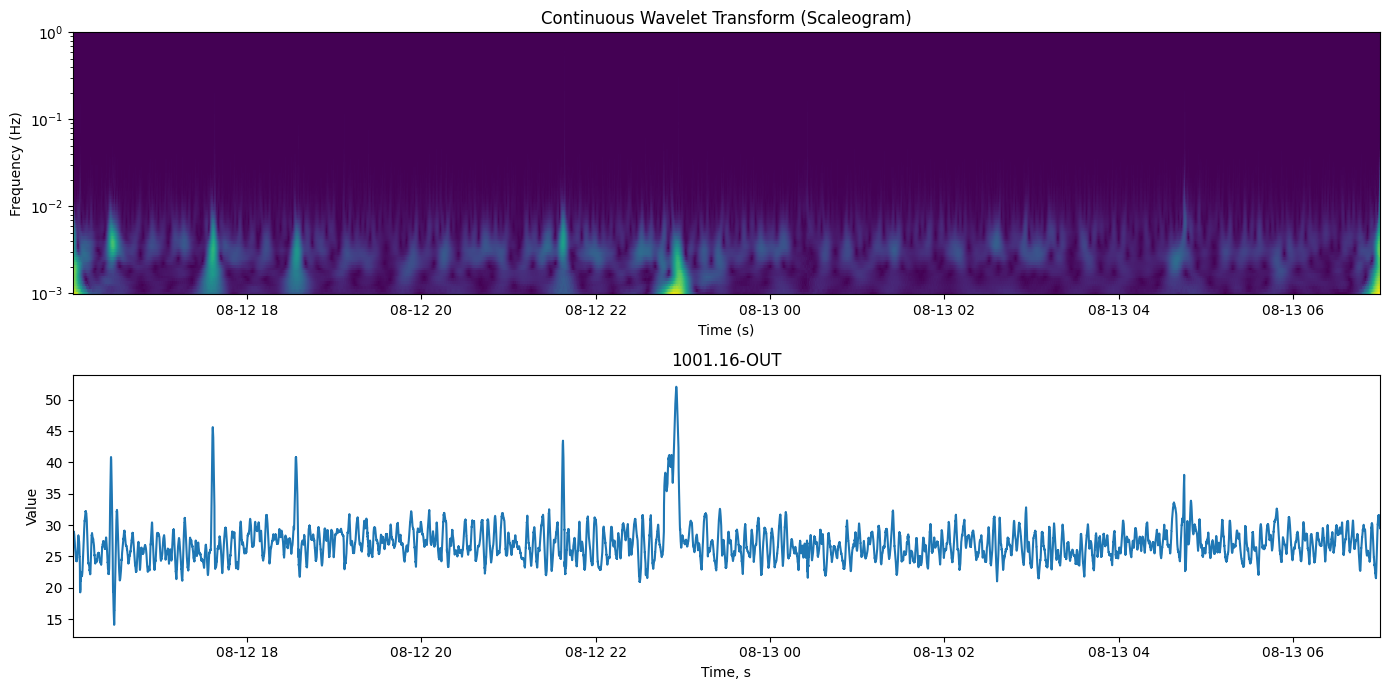

In [48]:
plot_wavelet(freqs, cwtmatr, col)